<a href="https://colab.research.google.com/github/AnnSenina/Python_for_DH_2023/blob/main/notebooks/%D0%B4%D0%BE%D0%BF%D0%BE%D0%BB%D0%BD%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5%20%D1%82%D0%B5%D1%82%D1%80%D0%B0%D0%B4%D0%BA%D0%B8/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение в линейную регрессию

Поиск уравнения. Прогнозы

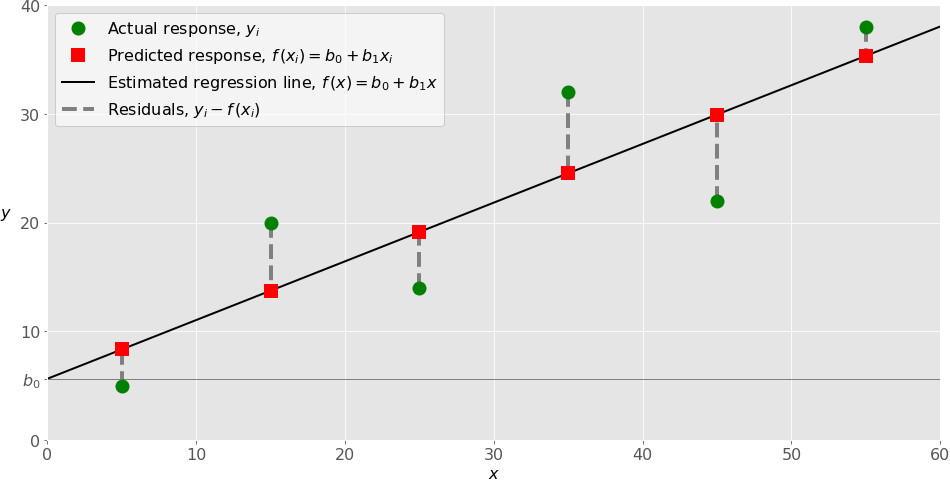

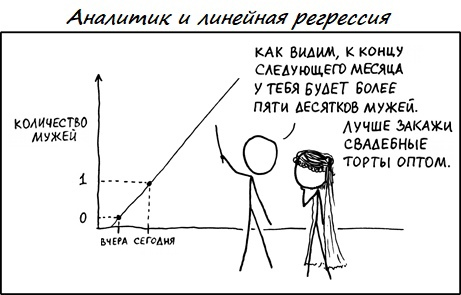

In [ ]:
# библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/AnnSenina/Other/main/BikeDataVar.csv')
df.head()

,Unnamed: 0,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8760 non-null   int64  
 1   Date                  8760 non-null   object 
 2   Hour                  8760 non-null   int64  
 3   Temperature           8581 non-null   float64
 4   Humidity              8760 non-null   int64  
 5   Wind speed            8760 non-null   float64
 6   Rainfall              8760 non-null   float64
 7   Snowfall              8760 non-null   float64
 8   Seasons               8760 non-null   object 
 9   Holiday               8760 non-null   int64  
 10  Functioning Day       8760 non-null   bool   
 11  Rental Count          8760 non-null   int64  
 12  Normal Humidity       8760 non-null   int64  
 13  Temperature Category  8581 non-null   object 
 14  Good Weather          8760 non-null   int64  
dtypes: bool(1), float64(4

In [ ]:
df = df.dropna()

In [ ]:
df.corr()

<ipython-input-5-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Holiday,Functioning Day,Rental Count,Normal Humidity,Good Weather
Unnamed: 0,1.000000,0.003719,0.579938,0.169166,-0.161513,0.037698,-0.140697,-0.066179,-0.185426,0.289085,-0.001727,0.133338
Hour,0.003719,1.000000,0.123090,-0.240837,0.283491,0.008461,-0.022328,0.003030,0.006785,0.345090,0.107621,0.074049
Temperature,0.579938,0.123090,1.000000,0.161933,-0.037797,0.050167,-0.220160,-0.055071,-0.049820,0.455155,0.022692,0.209042
Humidity,0.169166,-0.240837,0.161933,1.000000,-0.336703,0.235627,0.108260,-0.048521,-0.021026,-0.167654,-0.287082,-0.117157
Wind speed,-0.161513,0.283491,-0.037797,-0.336703,1.000000,-0.019915,-0.004156,0.020322,0.006580,0.095373,0.074199,0.032061
Rainfall,0.037698,0.008461,0.050167,0.235627,-0.019915,1.000000,0.008997,-0.013768,0.001619,-0.102811,-0.095080,-0.042360
Snowfall,-0.140697,-0.022328,-0.220160,0.108260,-0.004156,0.008997,1.000000,-0.012017,0.032281,-0.121464,-0.068624,-0.055901
Holiday,-0.066179,0.003030,-0.055071,-0.048521,0.020322,-0.013768,-0.012017,1.000000,-0.029372,-0.068637,-0.018038,0.029791
Functioning Day,-0.185426,0.006785,-0.049820,-0.021026,0.006580,0.001619,0.032281,-0.029372,1.000000,0.173439,0.004292,-0.102961
Rental Count,0.289085,0.345090,0.455155,-0.167654,0.095373,-0.102811,-0.121464,-0.068637,0.173439,1.000000,0.127706,0.195354


<ipython-input-6-799935ccd266>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap='RdYlGn');


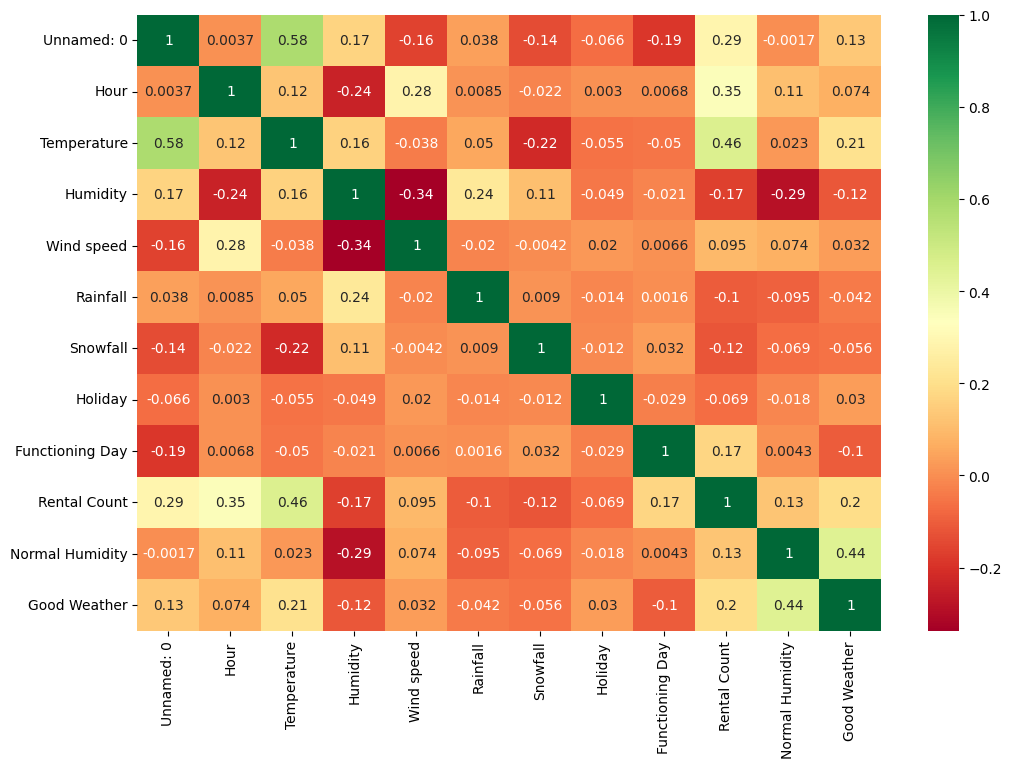

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True, cmap='RdYlGn');

Давайте предсказывать количество аренд велосипедов

y = Rental Count

x - лучше взять что-то, что коррелирует с y (это Temperature?)

Сразу вопрос: модель получится хорошая?

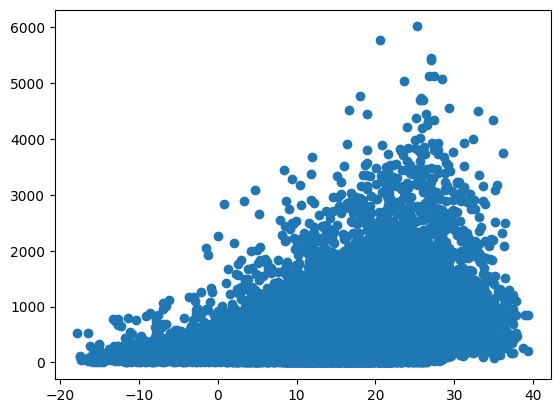

In [ ]:
plt.scatter(df['Temperature'], df["Rental Count"]);

## 1 способ

[Документация](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)

In [ ]:
# функция линейной регрессии Y = a + bX

x = df['Temperature']
y = df["Rental Count"]
res = scipy.stats.linregress(x, y)
print(res)

LinregressResult(slope=28.609586807803197, intercept=329.6584096540661, rvalue=0.45515528893511054, pvalue=0.0, stderr=0.6042611861138493, intercept_stderr=10.618088013948965)


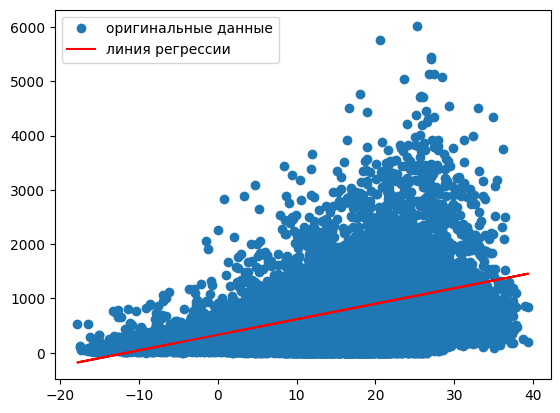

In [ ]:
# функция линейной регрессии Y = a + bX

plt.plot(x, y, 'o', label='оригинальные данные')
plt.plot(x, res.intercept + res.slope*x, 'r', label='линия регрессии')
plt.legend();
# intercept - число, которое мы прибавляем в уравнении
# slope - коэффициент для х

In [ ]:
print(f"R-squared: {res.rvalue**2:.6f}") # процент значений, описываемый уравнением

R-squared: 0.207166


## 2 способ

[Документация](https://scikit-learn.org/stable/modules/linear_model.html)

In [ ]:
x = df[['Temperature']]
y = df["Rental Count"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [ ]:
model = LinearRegression().fit(x_train, y_train)
print(model.intercept_)
print(model.coef_)

334.5455656274227
[28.56695004]


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
df_reg = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_reg

,Actual,Predicted
858,602,283.125056
1294,82,-62.535040
1493,35,111.723355
2321,573,631.641846
7295,0,737.339561
...,...,...
6611,732,1091.569742
5201,1686,1114.423302
6050,330,1102.996522
71,260,445.956671


In [ ]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred) # средняя разница по модулю между реальными и предсказанными значениями
meanSqErr = metrics.mean_squared_error(y_test, y_pred) # средний квадрат разницы между реальными и предсказанными значениями
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred)) # корень из предыдущей ошибки
print('R squared: {:.2f}'.format(model.score(x,y)*100)) # процент значений, который можно описать нашим уравнением регрессии
print('Mean Absolute Error:', meanAbErr) # здесь и далее - разные способы подсчета ошибок (чем ближе к 0, тем лучше!)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 20.71
Mean Absolute Error: 471.4709754923114
Mean Square Error: 446715.8918304723
Root Mean Square Error: 668.3680810978875


## Множественная линейная регрессия

Отличается тем, что в качестве x мы передаем не один столбец, а несколько

In [ ]:
x = df[['Temperature', 'Hour', 'Good Weather', 'Humidity']] # добавили показатель
y = df["Rental Count"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [ ]:
model = LinearRegression().fit(x_train, y_train)
print(model.intercept_)
print(model.coef_)

420.5498822360528
[ 27.77480189  25.92048282 149.06926556  -6.67383217]


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
df_reg = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_reg

,Actual,Predicted
858,602,543.475314
1294,82,304.408310
1493,35,-100.290249
2321,573,903.124240
7295,0,1054.632589
...,...,...
6611,732,1148.058828
5201,1686,1112.238937
6050,330,658.931117
71,260,524.397819


In [ ]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('R squared: {:.2f}'.format(model.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 32.59
Mean Absolute Error: 431.92105818166897
Mean Square Error: 378327.2314255335
Root Mean Square Error: 615.083109364526


Попробуйте добавить в модель еще несколько столбцов и проверить, улучшается ли работа модели?

# Сгруппируем данные по неделям

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 8581 entries, 0 to 8759
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
8581 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 134.1 KB


In [ ]:
# пандас умеет работать с датами, документация https://www.geeksforgeeks.org/python-pandas-series-dt-week/
bikes_sum = df.groupby(df['Date'].dt.week)['Rental Count'].sum()
temp_mean = df.groupby(df['Date'].dt.week)['Temperature'].mean()
humidity_mean = df.groupby(df['Date'].dt.week)['Humidity'].mean()
wind_mean = df.groupby(df['Date'].dt.week)['Wind speed'].mean()

df_weeks = pd.concat([bikes_sum, temp_mean, humidity_mean, wind_mean], axis=1)
df_weeks

<ipython-input-23-c5730be95641>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  bikes_sum = df.groupby(df['Date'].dt.week)['Rental Count'].sum()
<ipython-input-23-c5730be95641>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  temp_mean = df.groupby(df['Date'].dt.week)['Temperature'].mean()
<ipython-input-23-c5730be95641>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  humidity_mean = df.groupby(df['Date'].dt.week)['Humidity'].mean()
<ipython-input-23-c5730be95641>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  wind_mean = df.groupby(df['Date'].dt.week)['Wind speed'].mean()


,Rental Count,Temperature,Humidity,Wind speed
Date,,,,
1,38837,-2.691515,43.721212,1.520000
2,30282,-5.064848,53.872727,2.011515
3,40691,2.603049,55.707317,1.366463
4,22955,-10.020958,38.131737,2.573054
5,28074,-5.653614,47.897590,2.265663
6,32442,-5.507831,41.668675,2.259639
7,31070,-1.217500,38.568750,2.329375
8,50064,1.639521,49.952096,2.053892
9,50989,3.978788,55.430303,1.761212


In [ ]:
bikes_sum = df.groupby(df['Date'])['Rental Count'].sum() # по дням
temp_mean = df.groupby(df['Date'])['Temperature'].mean()
humidity_mean = df.groupby(df['Date'])['Humidity'].mean()
wind_mean = df.groupby(df['Date'])['Wind speed'].mean()

df_weeks = pd.concat([bikes_sum, temp_mean, humidity_mean, wind_mean], axis=1)
df_weeks

,Rental Count,Temperature,Humidity,Wind speed
Date,,,,
2017-12-01,9802,-2.454167,45.875000,1.537500
2017-12-02,7716,1.052174,62.869565,1.686957
2017-12-03,7805,4.822727,81.863636,1.622727
2017-12-04,9556,-0.304167,52.500000,3.450000
2017-12-05,6265,-4.321739,36.652174,1.100000
...,...,...,...,...
2018-11-26,13934,6.320833,70.500000,1.029167
2018-11-27,12931,7.123810,66.333333,1.376190
2018-11-28,16344,5.395652,25.434783,1.713043


In [ ]:
df_weeks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-12-01 to 2018-11-30
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rental Count  365 non-null    int64  
 1   Temperature   365 non-null    float64
 2   Humidity      365 non-null    float64
 3   Wind speed    365 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 14.3 KB


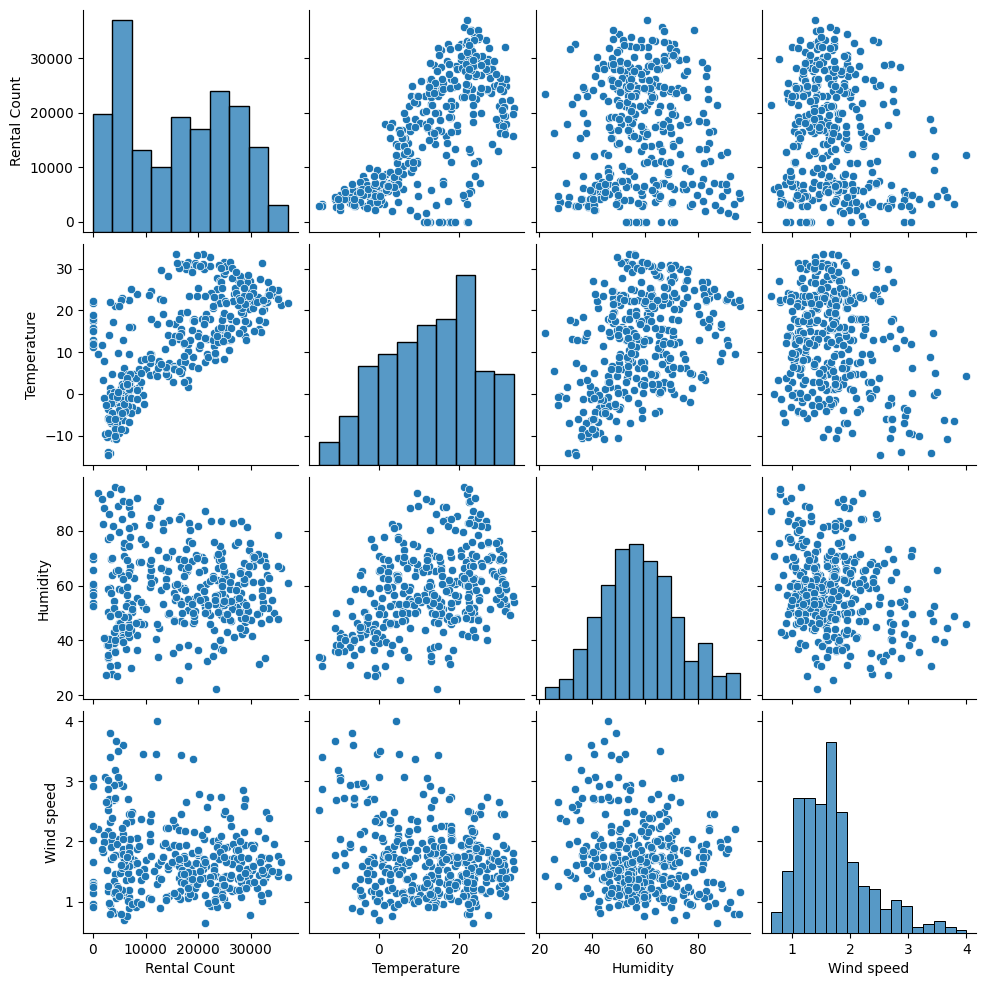

In [ ]:
sns.pairplot(df_weeks);

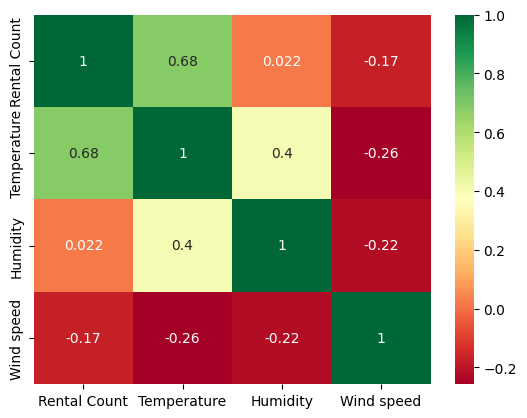

In [ ]:
sns.heatmap(df_weeks.corr(), annot=True, cmap='RdYlGn');

## Повторите ниже аналогичные шаги для датасета по неделям


In [ ]:
df_weeks.columns

Index(['Rental Count', 'Temperature', 'Humidity', 'Wind speed'], dtype='object')

In [ ]:
x = df_weeks[['Temperature', 'Humidity', 'Wind speed']] # добавили показатель
y = df_weeks["Rental Count"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)
model = LinearRegression().fit(x_train, y_train)
print(model.intercept_)
print(model.coef_)
y_pred = model.predict(x_test)

20103.040278335222
[ 705.95252685 -208.1345926  -472.97368281]


In [ ]:
df_reg = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_reg

,Actual,Predicted
Date,,
2018-04-27,24193,19390.754381
2018-04-05,2193,6221.396322
2018-10-11,21755,15324.449085
2018-01-26,2871,1449.516213
2018-07-30,19330,31082.549425
...,...,...
2018-04-16,23097,18282.826224
2018-06-10,27617,21953.930316
2018-11-26,13934,9404.991015


In [ ]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('R squared: {:.2f}'.format(model.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 54.54
Mean Absolute Error: 5186.77415872922
Mean Square Error: 44885082.595814764
Root Mean Square Error: 6699.633019488065


# Задание

Загрузите набор данных sandler.csv - набор данных для предсказания дохода от показа фильмов.

Столбцы Date - дата премьеры, Title - название, Genre - жанр, Studio - студия Theaters - число кинотеатров, Opening Gross - доход от премьеры, Opening Theaters - число кинотеатров для премьеры, Gross - общий доход

В качестве х возьмите: Theaters,	Opening, Opening Theaters

В качестве y - Gross



In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/AnnSenina/Other/main/sandler.csv')
df

,Date,Title,Genre,Studio,Theaters,Opening Gross,Opening Theaters,Gross
0,13.03.1992,Shakes the Clown,Comedy,IRS,9,$35 589,9,$115 103
1,23.07.1993,Coneheads,Comedy,Par.,1 978,$7 100 501,1 978,$21 274 717
2,05.08.1994,Airheads,Comedy,Fox,1 229,$1 911 739,1 228,$5 751 882
3,21.12.1994,Mixed Nuts,Comedy,Sony,1 318,$2 307 850,1 318,$6 821 850
4,10.02.1995,Billy Madison,Comedy,Uni.,1 887,$6 639 080,1 834,$25 588 734
5,16.02.1996,Happy Gilmore,Comedy,Uni.,2 069,$8 514 125,2 022,$38 824 099
6,06.09.1996,Bulletproof,Comedy,Uni.,2 242,$6 014 400,2 240,$21 576 954
7,13.02.1998,The Wedding Singer,Romantic Comedy,NL,2 837,$18 865 080,2 821,$80 245 725
8,12.06.1998,Dirty Work,Comedy,MGM,1 776,$3 634 236,1 776,$10 023 282
9,06.11.1998,The Waterboy,Comedy,BV,2 782,$39 414 071,2 664,$161 491 646


In [ ]:
# сделайте предобработку - она уже прописана
df['Opening Theaters']=df['Opening Theaters'].apply(lambda x: x.replace(' ','',10).replace("$",'',10))
df['Theaters']=df['Theaters'].apply(lambda x: x.replace(' ','',10).replace("$",'',10))
df['Gross']=df['Gross'].apply(lambda x: x.replace(' ','',10).replace("$",'',10))
df['Opening Gross']=df['Opening Gross'].apply(lambda x: x.replace(' ','',10).replace("$",'',10))
df.drop(['Date','Title', 'Genre', 'Studio'], axis=1, inplace=True)
df['Opening Theaters'] = pd.to_numeric( df['Opening Theaters'])
df['Theaters'] = pd.to_numeric( df['Theaters'])
df['Gross'] = pd.to_numeric( df['Gross'])
df['Opening Gross'] = pd.to_numeric( df['Opening Gross'])
x, y = df.drop(["Gross"], axis = 1), df['Gross']
# обучите модель на x, y
# сделайте предсказание

In [ ]:
df

,Theaters,Opening Gross,Opening Theaters,Gross
0,9,35589,9,115103
1,1978,7100501,1978,21274717
2,1229,1911739,1228,5751882
3,1318,2307850,1318,6821850
4,1887,6639080,1834,25588734
5,2069,8514125,2022,38824099
6,2242,6014400,2240,21576954
7,2837,18865080,2821,80245725
8,1776,3634236,1776,10023282
9,2782,39414071,2664,161491646


In [ ]:
x = 0
z = 40
y = 120 - x + 15 * z
y

720

In [ ]:
import numpy as np

Y  = np.array([12, 40, 8, 60, 61])
Z  = np.array([9, 36, 10, 57, 62])

print(Y - Z) # разница
print((Y - Z) ** 2) # в квадрат
print(sum((Y - Z) ** 2) / 5) # среднее

Y = [12, 40, 8, 60, 61]
Z = [9, 36, 10, 57, 62]

res = 0
for i in range(len(Y)):
  res += (Y[i] - Z[i]) ** 2
print(res / 5)

[ 3  4 -2  3 -1]
[ 9 16  4  9  1]
7.8
7.8


In [ ]:
import scipy.stats

y = [3.5, 7.2, 4.8, 4.1] # прогнозируем
x = [1020, 300, 900, 700]

res = scipy.stats.linregress(x, y)
res # => y = 8.29 + -0.004 * x

LinregressResult(slope=-0.0046452476572958505, intercept=8.291030789825971, rvalue=-0.9034115193010899, pvalue=0.09658848069891013, stderr=0.0015589682316341736, intercept_stderr=1.2151954868027648)

In [ ]:
x = [39, 48, 70]
y = [9, 10, 9]

print(scipy.stats.linregress(x, y))
print(-0.0085, 'то, что мы умножаем на x')
# y = -0.0085 * x + 9.779

LinregressResult(slope=-0.008519003931847968, intercept=9.77916120576671, rvalue=-0.23531579963319885, pvalue=0.8487751243753946, stderr=0.03518582898731009, intercept_stderr=1.8975353619277573)
-0.0085 то, что мы умножаем на x


In [ ]:
x = np.array([39, 48, 70])
y = np.array([9, 10, 9])

SSx = sum((x - x.mean()) ** 2)
SSx

508.66666666666663

In [ ]:
SSy = sum((y - y.mean()) ** 2)
SSy

0.6666666666666666

In [ ]:
SP = sum((x - x.mean()) * (y - y.mean()))
SP

-4.333333333333332

In [ ]:
b = SP / SSx
b

-0.008519003931847968

In [ ]:
a = y.mean() - b * x.mean()
a

9.77916120576671

In [ ]:
scipy.stats.linregress(x, y)

LinregressResult(slope=-0.008519003931847968, intercept=9.77916120576671, rvalue=-0.23531579963319885, pvalue=0.8487751243753946, stderr=0.03518582898731009, intercept_stderr=1.8975353619277573)